In [14]:
import numpy as np
from helpers import *
from implementations import *


In [15]:
# loading train data (takes 10 secs, avoid spamming cell)

yb, input_data, ids = load_csv_data("train.csv")
dimensions = np.shape(input_data)
N = dimensions[0]
P = dimensions[1]
yb = np.reshape(yb, [N,1])

In [16]:
# standardize data without the incomplete points, calculations done on _rem arrays (with -999 lines removed)
idx_incomplete_points = np.nonzero(input_data[:,4]==-999)

tx_rem = np.delete(input_data,idx_incomplete_points,0)
y_rem = np.delete(yb,idx_incomplete_points)

means = np.mean(tx_rem, axis=0)
means = means * np.ones(np.shape(tx_rem))
tx_rem_std = tx_rem - means

std_dev = np.std(tx_rem, axis=0)
std_dev = std_dev * np.ones(np.shape(tx_rem))
tx_rem_std = tx_rem_std / std_dev       # np.mean(tx_rem_std) should be ~0, np.std(tx_rem_std) should be 1


In [17]:
np.shape(tx_rem_std)
np.mean(tx_rem_std)



9.680507705906368e-17

In [18]:
tx_test = tx_rem_std[range(10),:]  # 100x30 data for faster testing of regression
y_test = yb[0:10]
print(y_test)
y_test[y_test==-1]= 0
yb[yb==-1] = 0
print(y_test)
# generate random indices
ratio = 0.8
num_row = len(y_test)
indices = np.random.permutation(num_row)
index_split = int(np.floor(ratio * num_row))
index_tr = indices[: index_split]
index_te = indices[index_split:]
# create split
x_tr = tx_test[index_tr]
x_te = tx_test[index_te]
y_tr = y_test[index_tr]
y_te = y_test[index_te]
print(y_te)

[[ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]]
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]]
[[0.]
 [0.]]


In [19]:
initial_w = np.ones([30,1])
max_iters = 100
gamma = 0.7
w_opt,loss = logistic_regression(y_test,tx_test,initial_w,max_iters,gamma)
w_opt2,loss2 = reg_logistic_regression(y_test, tx_test, 0.00014, initial_w, max_iters, gamma)

In [20]:
np.shape(initial_w)

(30, 1)

In [21]:
np.shape(w_opt)

(30, 1)

In [22]:
print(loss)
print(loss2)

0.02477665555209005
0.02546693725799965


In [23]:
#w_opt,loss = logistic_regression(y_rem,tx_rem_std,initial_w,max_iters,gamma)

[[0.09861733]]
[[-2.31650827]]
[[-0.10382539]]
[[0.03498374]]
[[-3.35287177]]
[[-0.03561033]]
[[0.98810677]]
[[-0.01196452]]
[[-4.43178592]]
[[0.99851081]]
[[-0.0014903]]
[[-6.5095229]]
[[0.0107826]]
[[-4.52982124]]
[[-0.01084116]]
[[0.99445603]]
[[-0.0055594]]
[[-5.19504368]]
[[0.00462958]]
[[-5.37528922]]
[[-0.00464033]]
[[0.00057101]]
[[-7.46810719]]
[[-0.00057117]]
[[0.00331315]]
[[-5.70985479]]
[[-0.00331865]]
[[0.99686665]]
[[-0.00313827]]
[[-5.76565313]]
[[0.99910773]]
[[-0.00089267]]
[[-7.02174205]]
[[0.00413936]]
[[-5.48721401]]
[[-0.00414795]]
[[0.99699851]]
[[-0.003006]]
[[-5.80864629]]
[[0.00288257]]
[[-5.84907344]]
[[-0.00288673]]
[[0.0003584]]
[[-7.93387131]]
[[-0.00035846]]
[[0.0024519]]
[[-6.01089377]]
[[-0.00245491]]
[[0.99746133]]
[[-0.0025419]]
[[-5.97611489]]
[[0.99909371]]
[[-0.0009067]]
[[-7.00614678]]
[[0.00372698]]
[[-5.59215776]]
[[-0.00373394]]
[[0.99720425]]
[[-0.00279967]]
[[-5.87965452]]
[[0.00286188]]
[[-5.85627804]]
[[-0.00286598]]
[[0.00035283]]
[[-7.949

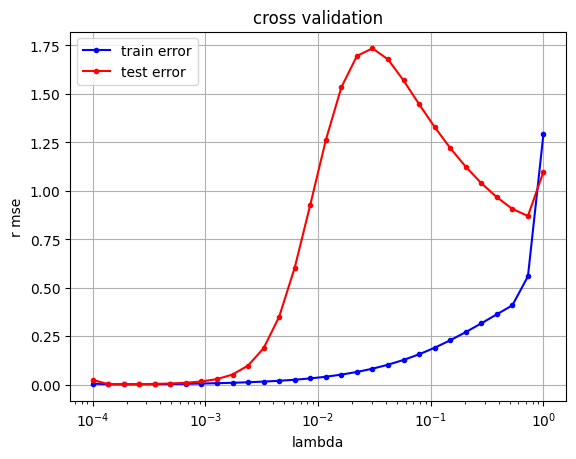

In [24]:
initial_w = np.ones([30,1])
max_iters = 70
gamma = 0.7
best_lambda, best_rmse = cross_validation_demo(y_test, tx_test, 7, 4,initial_w,  np.logspace(-4, 0, 30), 3 ,gamma, max_iters )
print(best_rmse)

In [25]:
#Calcul du meilleur lambda pour chaque colonne
degres = []
for column in range (P) : 
    print ('column')
    print(column)
    degres.append(best_degree_selection(y_tr,x_tr[:,column],np.arange(1,11), 4, np.logspace(-2, 0, 50),  initial_w, gamma,max_iters, column))

column
0
1
[[0.52276981]
 [0.49897957]]
[[-0.64861405]
 [-0.69519013]]
[[-0.73975632]
 [-0.6911084 ]]
degree and loss
1
0.717473225564206
[[0.44811417]
 [0.4695769 ]]
[[-0.80270723]
 [-0.7559232 ]]
[[-0.59441409]
 [-0.63408029]]
degree and loss
1
0.7183937606853725
[[0.32580961]
 [0.46453329]]
[[-1.12144208]
 [-0.76672206]]
[[-0.39424273]
 [-0.62461656]]
degree and loss
1
0.9440820667478701
[[0.22595784]
 [0.76911408]]
[[-1.48740682]
 [-0.26251598]]
[[-0.25612894]
 [-1.46583153]]
degree and loss
1
0.8609802342268665
[[1.]
 [1.]]
[[0.]
 [0.]]
[[-inf]
 [-inf]]
degree and loss
1
nan
[[1.]
 [1.]]
[[0.]
 [0.]]
[[-inf]
 [-inf]]
degree and loss
1
nan
[[1.]
 [1.]]
[[0.]
 [0.]]
[[-inf]
 [-inf]]
degree and loss
1
nan
[[1.]
 [1.]]
[[0.]
 [0.]]
[[-inf]
 [-inf]]
degree and loss
1
inf
[[0.50401047]
 [0.4982914 ]]
[[-0.68515823]
 [-0.69657023]]
[[-0.70120047]
 [-0.68973581]]
degree and loss
1
0.6988853481778159
[[0.49802239]
 [0.49862884]]
[[-0.69711025]
 [-0.69589326]]
[[-0.68919976]
 [-0.69040862]]

/Users/toye/Desktop/ML_project1/implementations.py:241: RuntimeWarning: divide by zero encountered in log
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )
/Users/toye/Desktop/ML_project1/implementations.py:241: RuntimeWarning: invalid value encountered in matmul
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )
/Users/toye/Desktop/ML_project1/implementations.py:324: RuntimeWarning: divide by zero encountered in log
  print(np.log(1-sigmoid(x_te@w)))
/Users/toye/Desktop/ML_project1/implementations.py:225: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))
/Users/toye/Desktop/ML_project1/implementations.py:323: RuntimeWarning: divide by zero encountered in log
  print(np.log(sigmoid(x_te@w)))


[[0.18148511]
 [0.78625237]]
[[-1.70658165]
 [-0.24047746]]
[[-0.20026369]
 [-1.54295926]]
degree and loss
2
0.8716114742559349
[[1.]
 [1.]]
[[0.]
 [0.]]
[[-inf]
 [-inf]]
degree and loss
2
nan
[[1.]
 [1.]]
[[0.]
 [0.]]
[[-inf]
 [-inf]]
degree and loss
2
nan
[[1.]
 [1.]]
[[0.]
 [0.]]
[[-inf]
 [-inf]]
degree and loss
2
nan
[[1.]
 [1.]]
[[0.]
 [0.]]
[[-inf]
 [-inf]]
degree and loss
2
inf
[[0.50497302]
 [0.49820711]]
[[-0.68325028]
 [-0.69673941]]
[[-0.70314301]
 [-0.68956781]]
degree and loss
2
0.6999412080065233
[[0.49732817]
 [0.49823085]]
[[-0.69850516]
 [-0.69669176]]
[[-0.68781776]
 [-0.68961512]]
degree and loss
2
0.6940601406624523
[[0.36021017]
 [0.35995667]]
[[-1.02106762]
 [-1.02177162]]
[[-0.44661554]
 [-0.4462194 ]]
degree and loss
2
1.0214196197287198
[[0.65229999]
 [0.64230659]]
[[-0.42725071]
 [-0.44268953]]
[[-1.05641522]
 [-1.02807906]]
degree and loss
2
1.0422471443012706
[[0.4997859 ]
 [0.49929177]]
[[-0.69357547]
 [-0.69456464]]
[[-0.69271907]
 [-0.69173173]]
degree an

In [26]:
print(degres)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [27]:
for column in range (P) : 
    

IndentationError: expected an indented block (3157159925.py, line 2)